In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Task 1 : Take input from the given source data file and plot all the points

In [19]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/Pattern Lab Data/data_k_mean.txt', header = None, sep=' ')

#converting dataframe into array
arr = df.values

print(df.head())

         0        1
0 -7.87157 -4.86573
1 -4.76661 -6.87944
2 -6.67986 -5.83080
3 -8.93021 -4.15571
4 -7.91375 -4.22840


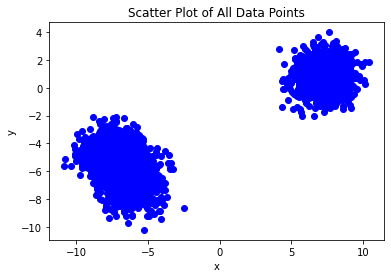

In [20]:
#scatter plot of the dataset
fig, ax = plt.subplots()
ax.scatter(df[0], df[1], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of All Data Points')
plt.show()

### Task 2 : Perform the k-means clustering algorithm applying Euclidean distance as a distance measure on the given dataset. The value of k will be taken from user.

In [21]:
#function for euclidean distance
def euclidean_dist(x, y):
  dist = 0
  for i in range(len(x)):
    dist += (x[i] - y[i]) ** 2

  return math.sqrt(dist)

In [22]:
#function for k-means clustering

def k_means(k, arr, max_iteration):
  
  #calculating sample size 
  m = len(arr)

  #randomly sample out k centroids
  np.random.seed(2)
  rand_idx = np.random.randint(m, size=k)
  centroids = np.array( [arr[i] for i in rand_idx] )

  #initialization of matrix
  distance_matrix = np.zeros((k,m))
  group_matrix = np.empty(m)
  prev_group_matrix = np.empty(m)

  #calculating object-centroid distance
  for itr in range(max_iteration):

    for i in range(m):
      for j in range(k):
        distance_matrix[j, i] = euclidean_dist(arr[i], centroids[j])

    group_matrix = np.argmin(distance_matrix, axis=0)
  
    if (np.array_equal(group_matrix, prev_group_matrix)):
      print("Iteration Taken: ",itr)
      break
  
    prev_group_matrix = group_matrix.copy()

    #updating centroids
    for i in range(k):
      #sampling out class i samples from group matrix
      arr_subset = arr[group_matrix == i]
      centroids[i] = np.sum(arr_subset, axis=0) / arr_subset.shape[0]
    
  return group_matrix

In [23]:
#call k_means function for our dataset
k = 2
max_iteration = 200
group_matrix = k_means(k, arr, max_iteration)

Iteration Taken:  2


### Task 3 : Color the corresponding points on the clusters with different colors

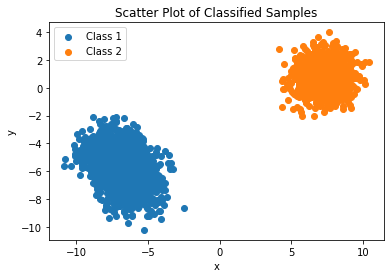

In [24]:
#scatter plot according to the class label
fig, ax = plt.subplots()

for i in range(k):
  data = arr[ group_matrix == i]
  ax.scatter(data[:,0], data[:,1], label='Class '+str(i+1))

ax.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Classified Samples')
plt.show()